### Linear Regression using our own class method and Sklearn library

In [1]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

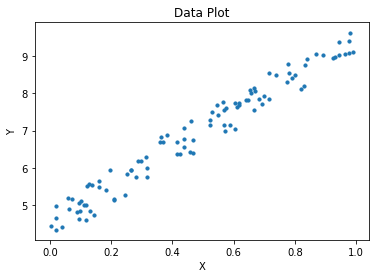

In [2]:
#Generate the random data set for prediction and use same for our class and skearn library 
np.random.seed(0)
X = np.random.rand(100,1)
Y = 4 + 5*X + np.random.rand(100,1)

#Plotting the data 
plt.scatter(X,Y,s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Plot')
plt.show()

In [17]:
#Class for Linear Regression

class Linear_Regression:
    
    def __init__(self):
        self.m = 0
        self.c = 0
        self.pltloss = []
        
    def Predict_line(self,x):
        return (self.m*x)+self.c
    
    def grad_m(self,x,y):
        y_pred = self.Predict_line(x)
        return 2*(y_pred - y)*x
    
    def grad_c(self,x,y):
        y_pred = self.Predict_line(x)
        return 2*(y_pred - y)
    
    def Loss(self,x,y):
        loss = 0
        residual = 0
        for x,y in zip(X,Y):
            residual = self.Predict_line(x) - y
            loss += (residual)**2
        return (loss/len(X))
    
    def RMSE(self,X,Y):
        mse = 0
        rmse = 0
        for x,y in zip(X,Y):
            mse += (self.Predict_line(x)-y)**2
        mse = mse/len(X)
        rmse = np.sqrt(mse)
        return rmse
    
    def R2_value(self,X,Y):
        sst = 0
        ssr = 0
        for x,y in zip(X,Y):
            ssr += (self.Predict_line(x) - y)**2
        sst = np.sum((Y-np.mean(Y))**2)
        r2 = 1 - (ssr/sst)
        return r2
    
    def fit(self,X,Y,eta=0.5):
        dm = 0
        dc = 0
        
        for x,y in zip(X,Y):
            dm += ((self.grad_m(x,y))/len(X))
            dc += ((self.grad_c(x,y))/len(X))
            
        self.m -= eta*dm
        self.c -= eta*dc
        self.pltloss.append(self.Loss(X,Y))
        
    

In [4]:
LR = Linear_Regression()

In [5]:
#1st Run 
LR.fit(X,Y)

In [6]:
print("m = ",LR.m,"c = ",LR.c)

m =  [3.66883457] c =  [6.89205095]


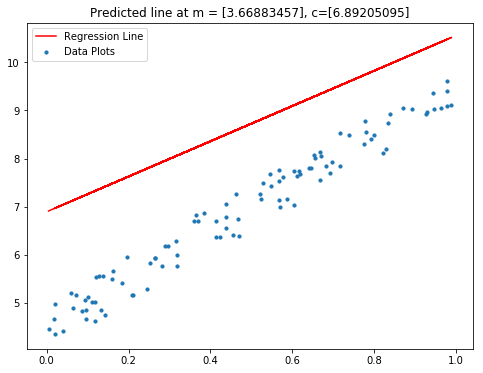

In [7]:
#Visualizing the fit after 1st run
plt.figure(figsize=(8,6))
YY = LR.Predict_line(X)
plt.scatter(X,Y,s=10,label='Data Plots')
plt.plot(X,YY,color='r',label='Regression Line')
plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
plt.legend()
plt.show()

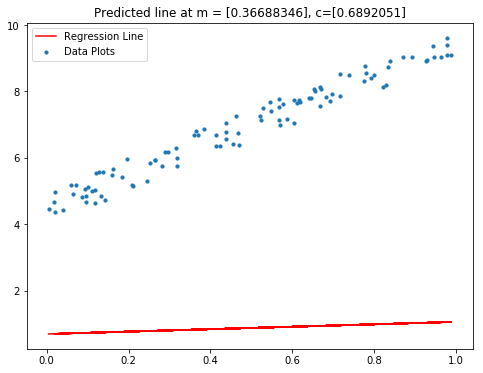

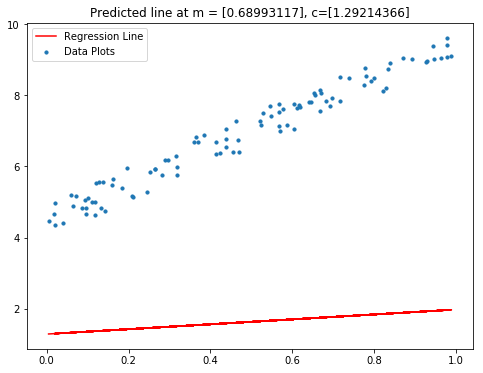

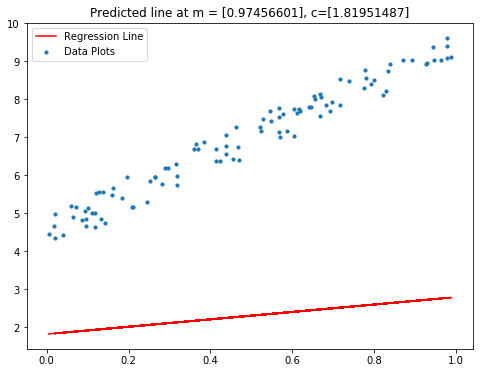

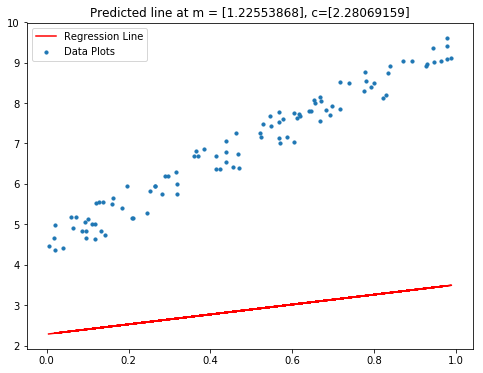

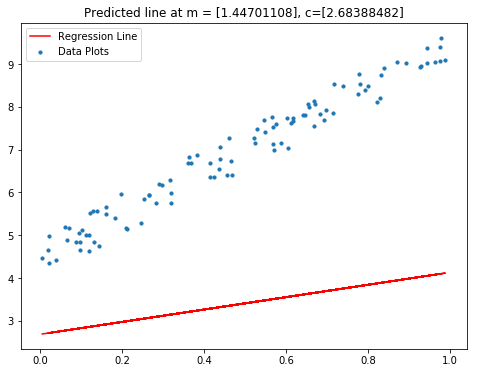

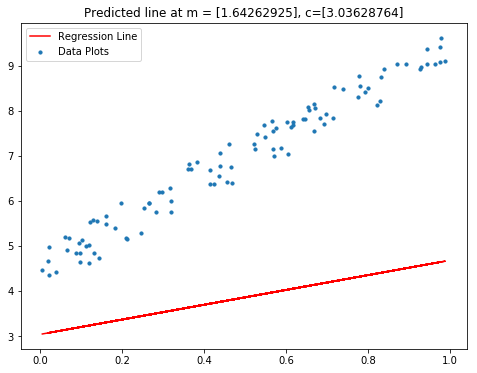

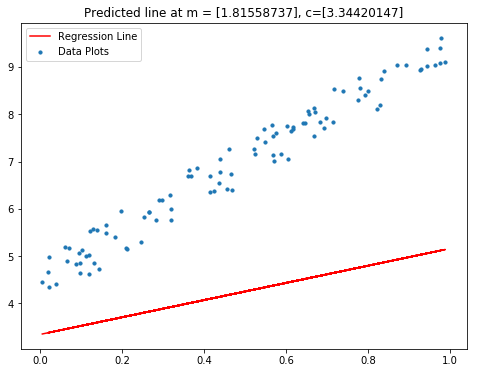

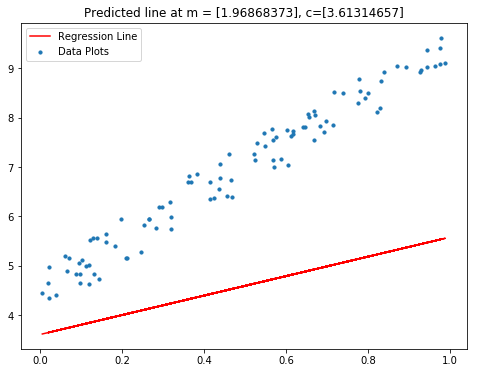

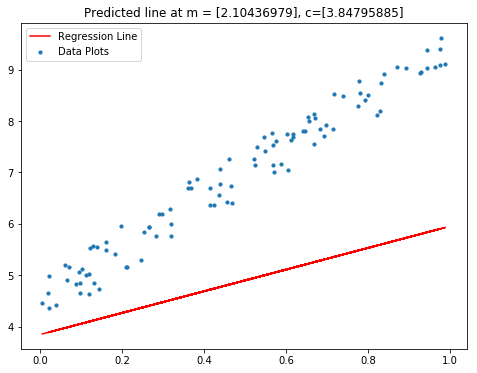

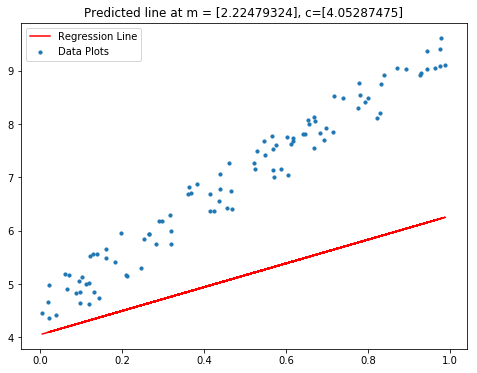

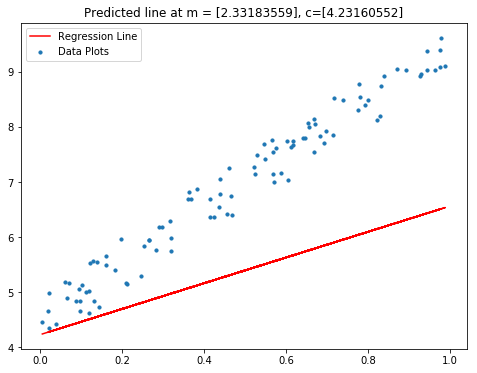

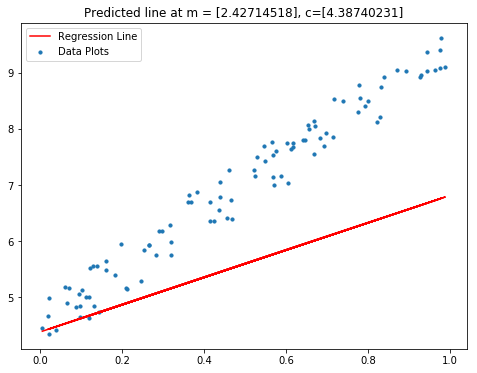

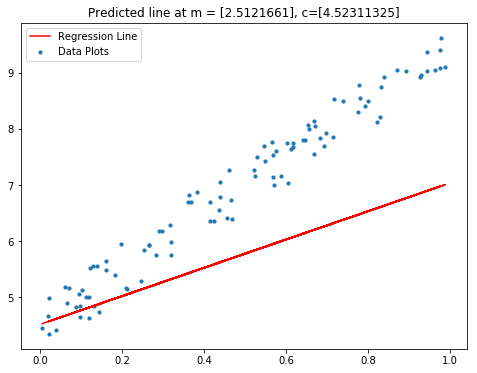

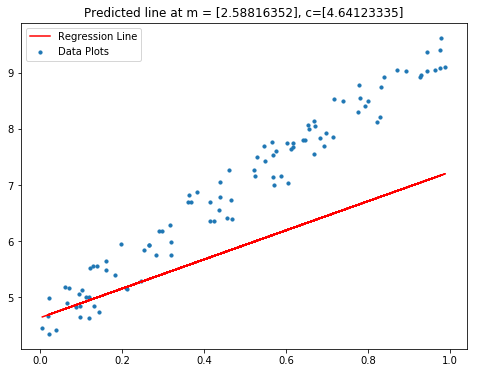

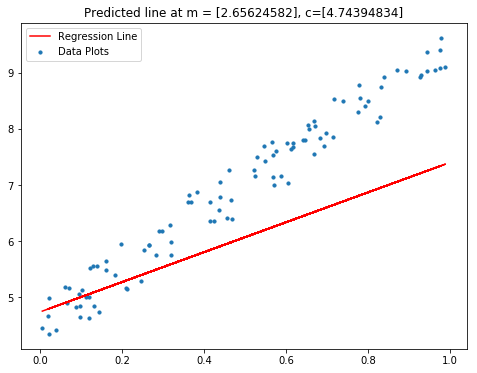

In [8]:
#Run for 15 iterations and visualizing it
LR = Linear_Regression()
for x in range(0,15):
    LR.fit(X,Y,0.05)#Learning Rate = 0.05
    plt.figure(figsize=(8,6))
    YY = LR.Predict_line(X)
    plt.scatter(X,Y,s=10,label='Data Plots')
    plt.plot(X,YY,color='r',label='Regression Line')
    plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
    plt.legend()
    plt.show()

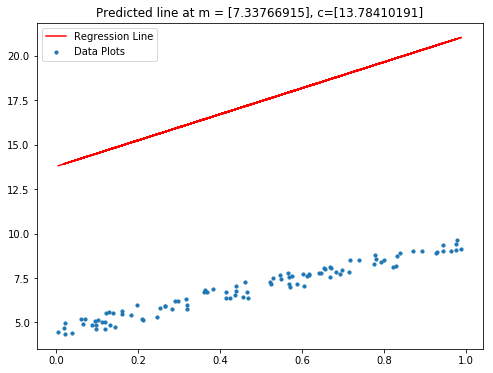

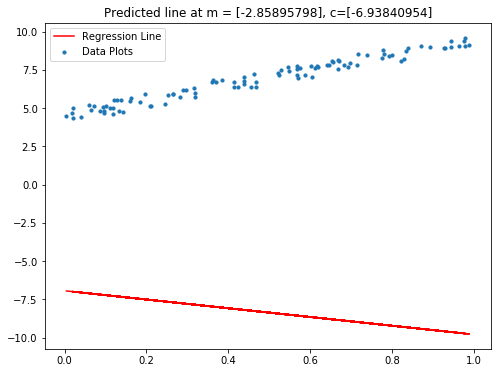

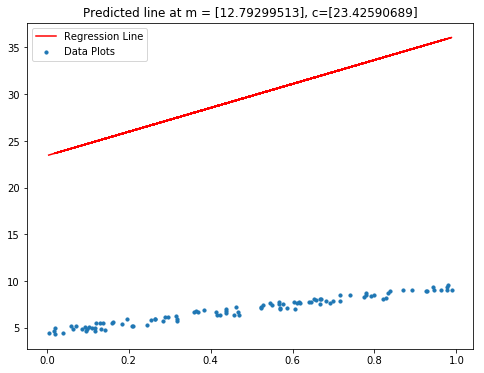

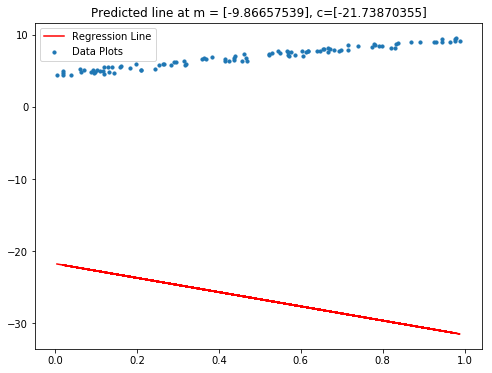

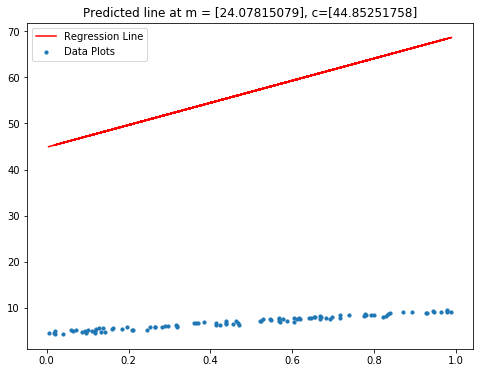

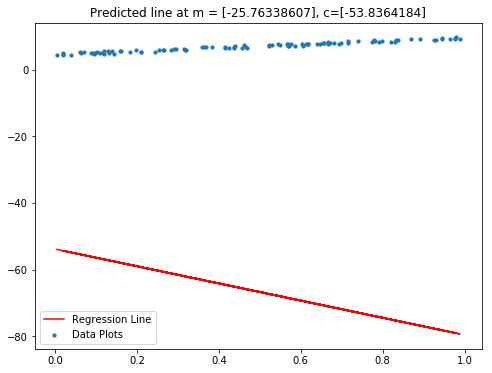

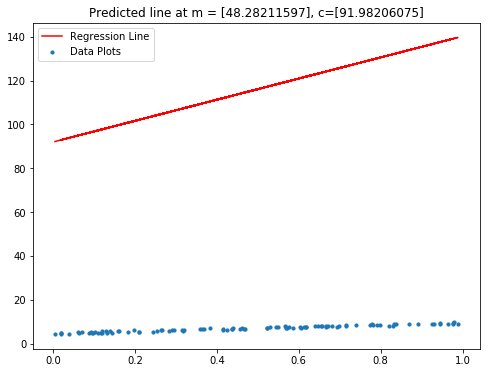

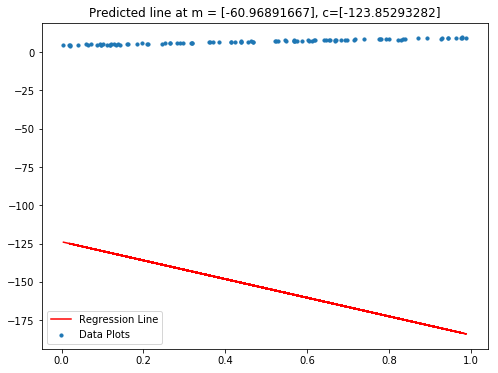

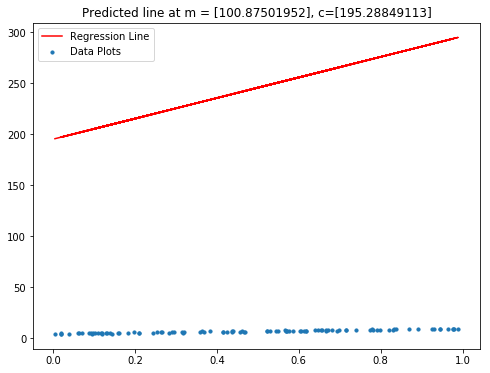

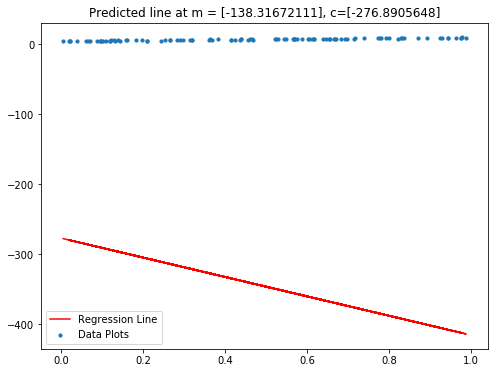

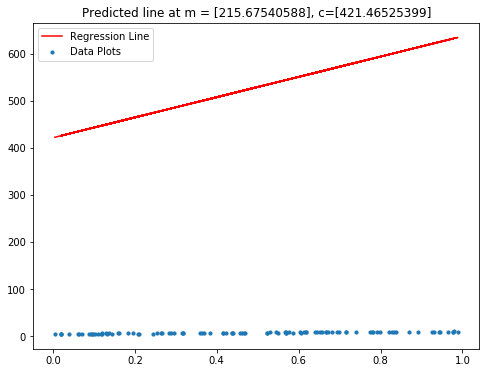

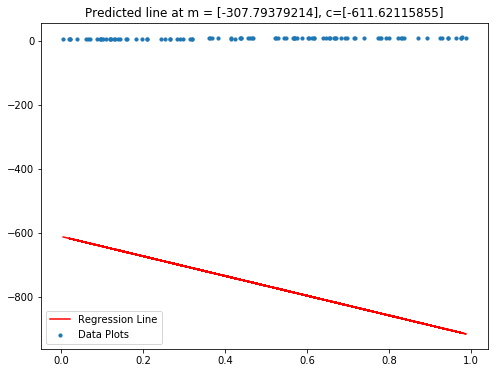

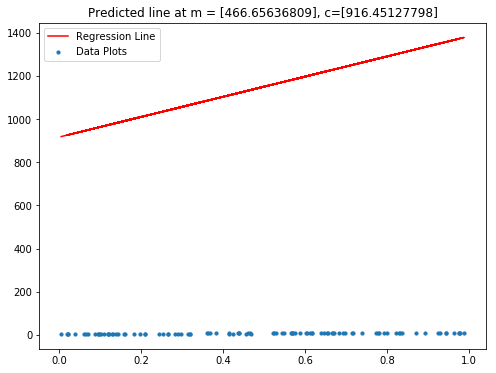

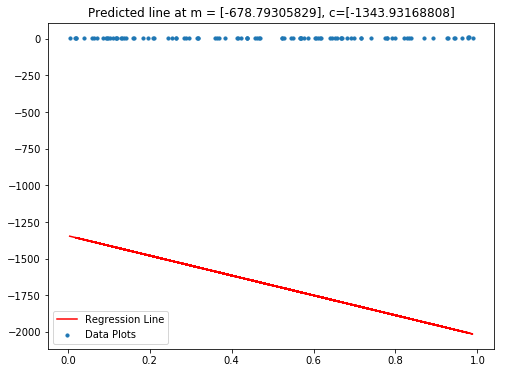

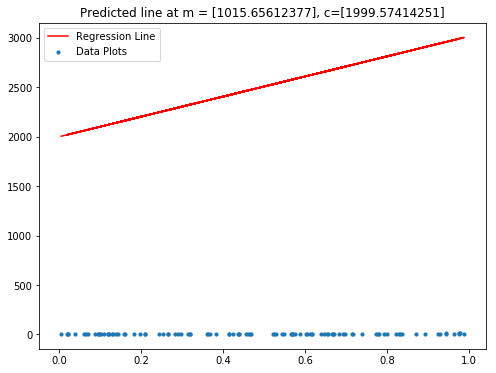

In [9]:
#Running with Higher Learning Rate
LR = Linear_Regression()
for x in range(0,15):
    LR.fit(X,Y,1)#Learning Rate = 1
    plt.figure(figsize=(8,6))
    YY = LR.Predict_line(X)
    plt.scatter(X,Y,s=10,label='Data Plots')
    plt.plot(X,YY,color='r',label='Regression Line')
    plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
    plt.legend()
    plt.show()

#With high Learning rate regression line overshoots our data point

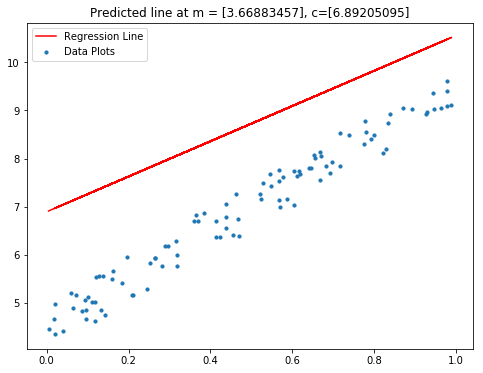

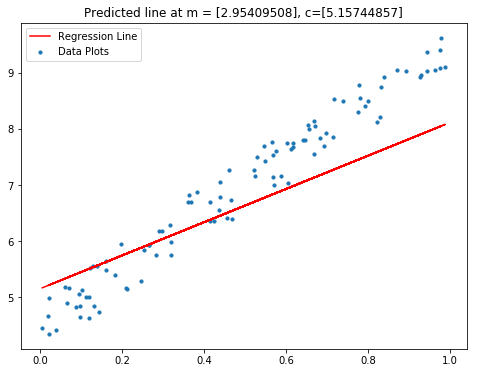

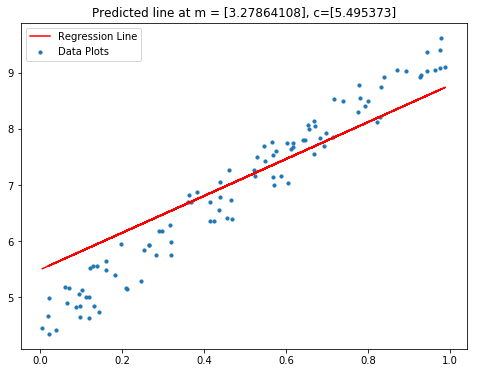

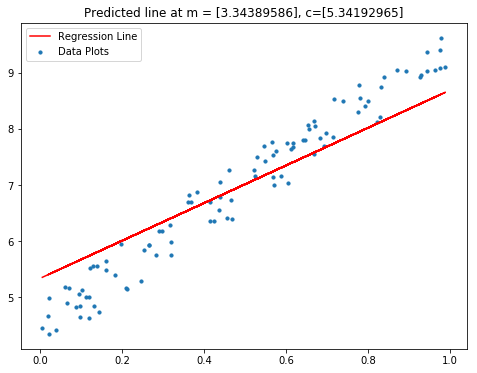

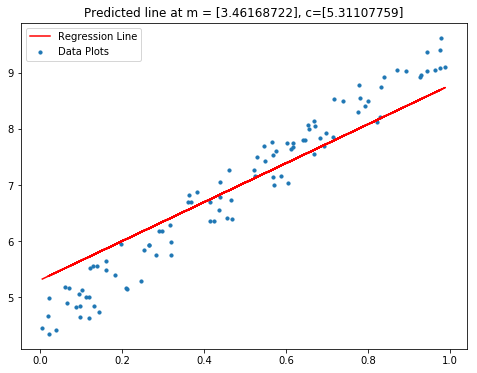

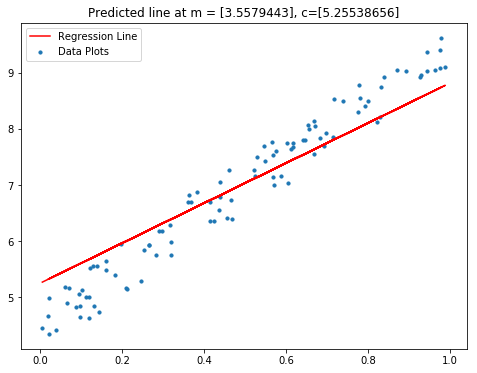

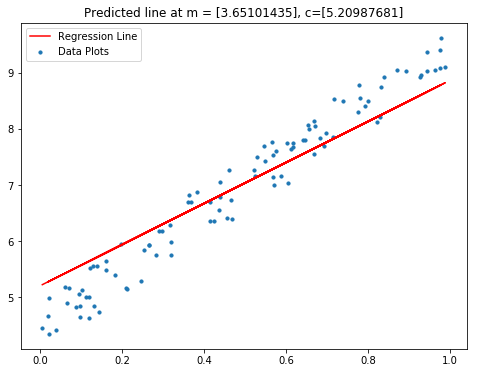

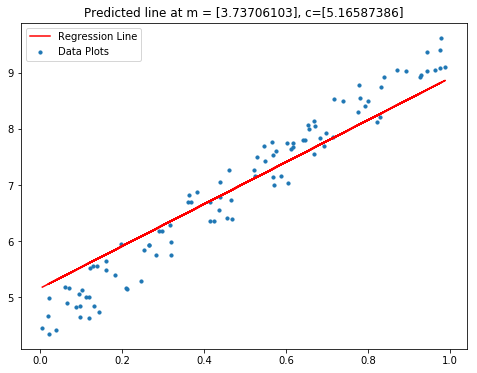

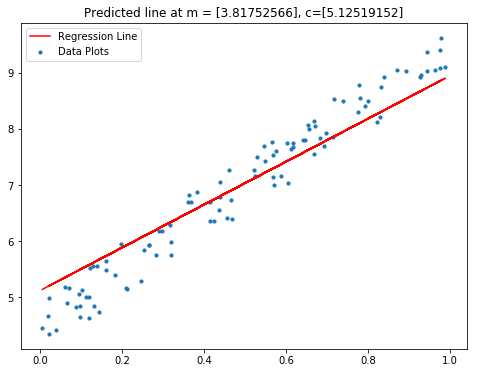

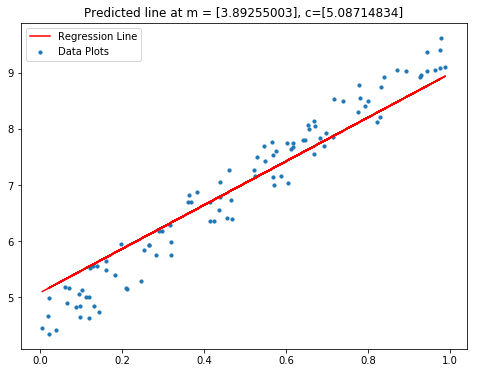

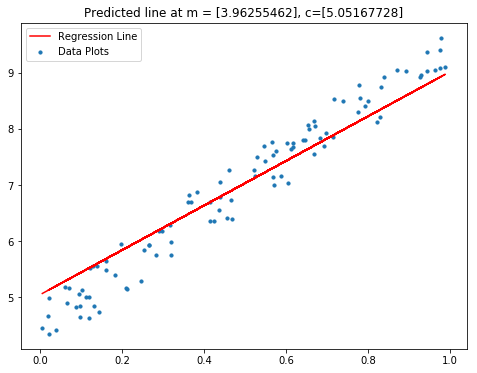

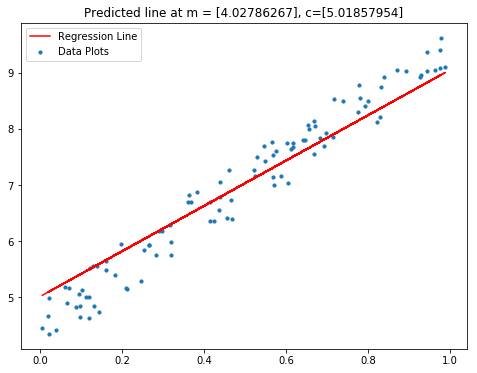

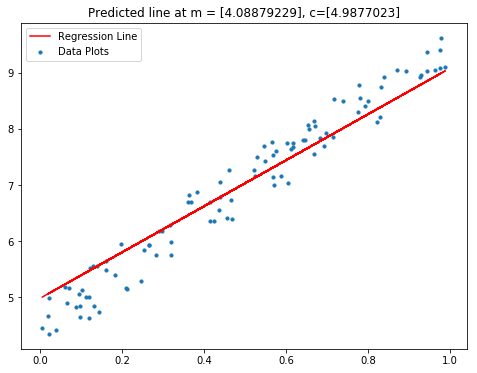

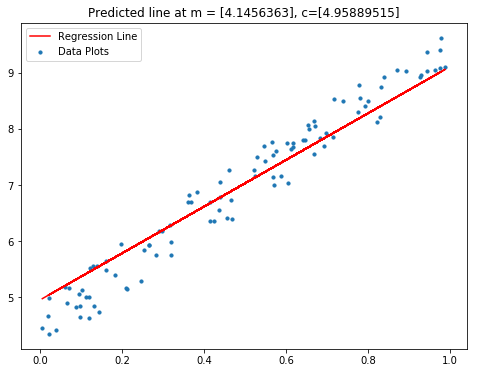

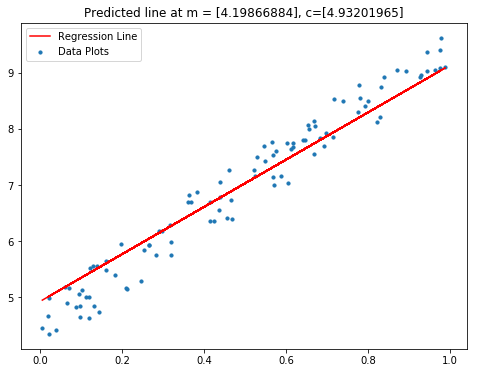

In [10]:
#Running with 0.5 Learning Rate
LR = Linear_Regression()
for x in range(0,15):
    LR.fit(X,Y,0.5)#Learning Rate = 0.5
    plt.figure(figsize=(8,6))
    YY = LR.Predict_line(X)
    plt.scatter(X,Y,s=10,label='Data Plots')
    plt.plot(X,YY,color='r',label='Regression Line')
    plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
    plt.legend()
    plt.show()

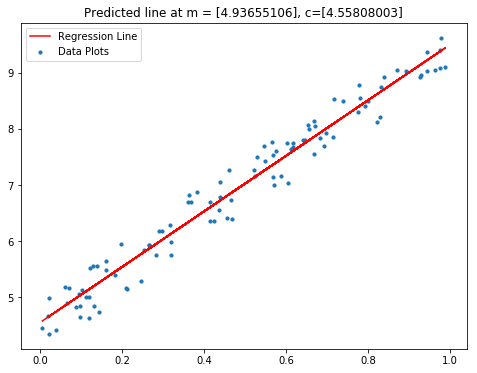

In [11]:
# Lets take 3000 Runs
LR = Linear_Regression()
for x in range(0,3000):
    LR.fit(X,Y,0.05)#Learning Rate = 0.05
plt.figure(figsize=(8,6))
YY = LR.Predict_line(X)
plt.scatter(X,Y,s=10,label='Data Plots')
plt.plot(X,YY,color='r',label='Regression Line')
plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
plt.legend()
plt.show()

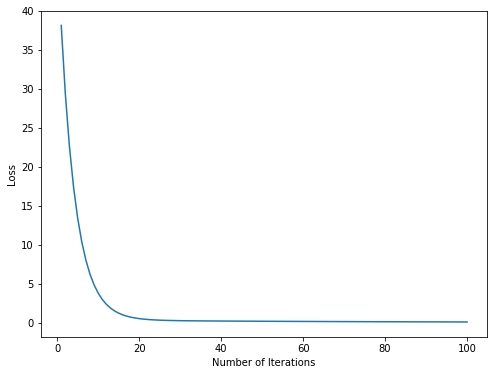

In [13]:
#Visualizing the loss VS Number of iterations
iter = []
LR = Linear_Regression()
for x in range(0,100):
    LR.fit(X,Y, 0.05)
    iter.append(x+1)
plt.figure(figsize=(8,6))
plt.plot(iter, LR.pltloss)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

### Evaluation of Model
Root Mean Square Error : RMSE


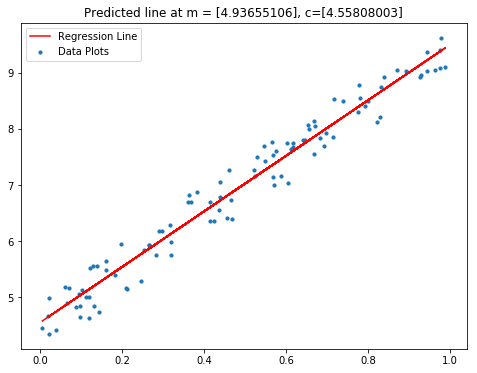

In [15]:
#Running again to compute RMSE

# Lets take 3000 Runs
LR = Linear_Regression()
for x in range(0,3000):
    LR.fit(X,Y,0.05)#Learning Rate = 0.05
plt.figure(figsize=(8,6))
YY = LR.Predict_line(X)
plt.scatter(X,Y,s=10,label='Data Plots')
plt.plot(X,YY,color='r',label='Regression Line')
plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
plt.legend()
plt.show()

In [16]:
LR.RMSE(X,Y)

array([0.27610369])

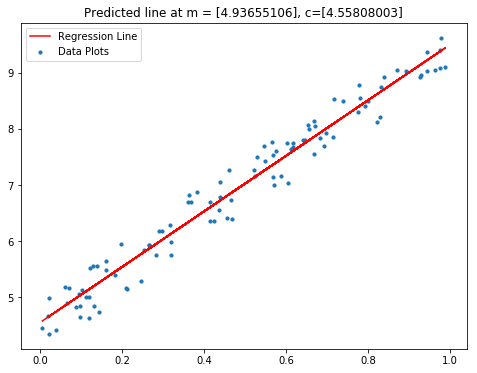

In [18]:
#Running again to compute R2 Score

# Lets take 3000 Runs
LR = Linear_Regression()
for x in range(0,3000):
    LR.fit(X,Y,0.05)#Learning Rate = 0.05
plt.figure(figsize=(8,6))
YY = LR.Predict_line(X)
plt.scatter(X,Y,s=10,label='Data Plots')
plt.plot(X,YY,color='r',label='Regression Line')
plt.title('Predicted line at m = {}, c={}'.format(LR.m,LR.c))
plt.legend()
plt.show()

In [19]:
LR.R2_value(X,Y)

array([0.96372913])

### Implement Using Scikit Library

Slop - m:  [[4.93655106]]
Intercept- c:  [4.55808002]


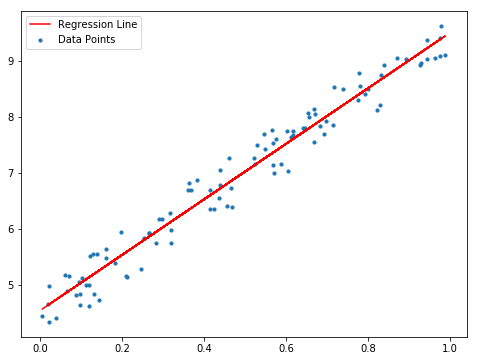

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#Initialize the model
LR_scikit = LinearRegression()

#Fit the data
LR_scikit.fit(X,Y)

Y_est = LR_scikit.predict(X)

#Lets plot the Regression line and Data Point after fit
print("Slop - m: ",LR_scikit.coef_)
print("Intercept- c: ",LR_scikit.intercept_)

plt.figure(figsize=(8,6))
plt.scatter(X,Y,s = 10, label = 'Data Points')
plt.plot(X,Y_est,color = 'r',label='Regression Line')
plt.legend()
plt.show()

Compare the predicted regression line Through sklearn and our Own class. 
For both the equation of regression line is same.

In [21]:
#Evaluating the model

#RMSE
mse = mean_squared_error(Y,Y_est)
RMSE = np.sqrt(mse)
print("RMSE = ", RMSE)


RMSE =  0.2761036867351648


In [22]:
#R2 Score
r2 = r2_score(Y,Y_est)
print("R2 Score : ", r2)

R2 Score :  0.9637291269612669
